# Задания 
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?


## Описание данных

Имеются следующие поля:

- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Year – год релиза
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import mode

# Задание 1
Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [2]:
#загрузить данные 
df = pd.read_csv('./games.csv')

In [3]:
#просмотр табл
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#пазмер df
df.shape

(16598, 11)

In [5]:
#тип данных
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим, какие переменные являются количественными, а какие категориальными. Соотнесите названия переменных с соответствующим типом данных.

- Rank – Ранговая (порядковая) переменная 
- Name – Номинативная (категориальная) переменная
- Platform – Номинативная (категориальная) переменная
- Year – Дискретная переменная
- Genre – Номинативная (категориальная) переменная
- Publisher – Номинативная (категориальная) переменная
- NA_Sales – Непрерывная переменная
- EU_Sales – Непрерывная переменная
- JP_Sales – Непрерывная переменная
- Other_Sales – Непрерывная переменная
- Global_Sales – Непрерывная переменная

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
#отформатируем названия 
rename_columns = {}
for col in df.columns:
    rename_columns[col] = col.lower()

In [9]:
rename_columns

{'Rank': 'rank',
 'Name': 'name',
 'Platform': 'platform',
 'Year': 'year',
 'Genre': 'genre',
 'Publisher': 'publisher',
 'NA_Sales': 'na_sales',
 'EU_Sales': 'eu_sales',
 'JP_Sales': 'jp_sales',
 'Other_Sales': 'other_sales',
 'Global_Sales': 'global_sales'}

In [10]:
df = df.rename(columns=rename_columns)
df.head(2)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [11]:
#кол-во пропусков
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [12]:
#удалить пропущенные значение
df.dropna(inplace=True)

# Задание 2
Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [13]:
df.year

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: year, Length: 16291, dtype: float64

In [14]:
#Year - дискретная величина. В данных плавающая точка не нужна.
#переведем тип данных Year в int
df.year = df.year.astype('int')

In [15]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),


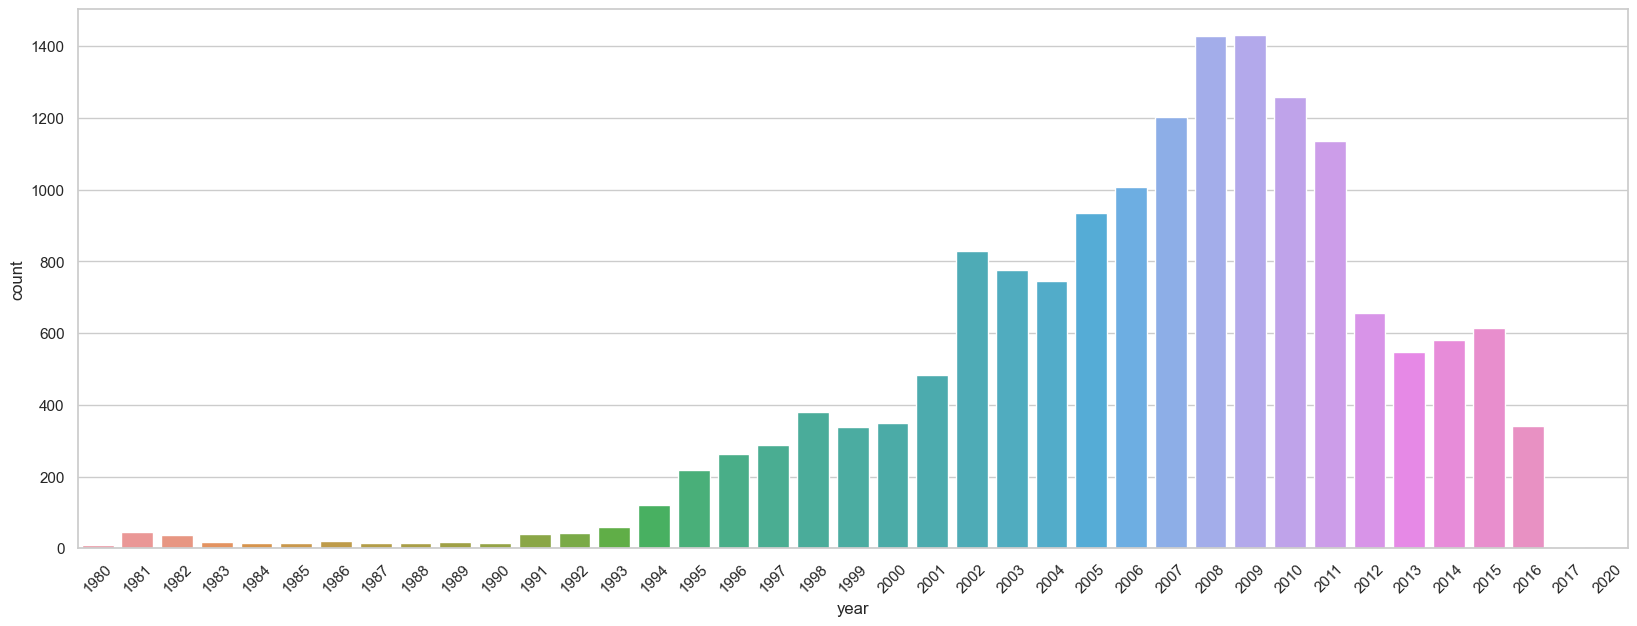

In [16]:
#кол-во годов (график)
sns.set_theme(style="whitegrid")
sns.countplot(x=df.year)
plt.xticks(rotation=45)

In [17]:
df.year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

In [18]:
#является ли 2007-ой год точкой перегиба (можно проверить др способом)
df.query("year <= 2007").shape[0]/16291, df.query("year > 2007").shape[0]/16291

(0.5093609968694371, 0.4906390031305629)

In [19]:
#определить моду #предварительно загрузила пакет from scipy.stats import mode
mode(df.year)

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_32240\3719250304.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(df.year)


ModeResult(mode=array([2009]), count=array([1431]))

In [20]:
#второй способ
df.year.value_counts().reset_index().head()

,index,year
0,2009,1431
1,2008,1428
2,2010,1257
3,2007,1201
4,2011,1136


# Задание 3
На каких платформах произошло больше всего релизов?
Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [21]:
platform = df.platform.value_counts(normalize=True).mul(100).to_frame('pct')

In [22]:
platform.query("pct > 7").index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

# Задание 4
Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [23]:
df.publisher.value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: publisher, dtype: int64

In [24]:
mode(df.publisher)

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_32240\2766642083.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(df.publisher)
C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_32240\2766642083.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode(df.publisher)


ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

# Задание 5
Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

Hint: mean, median, std. Переменные: NA_sales и т.д. для нужных регионов.

In [25]:
nintendo = df.query("publisher == 'Nintendo'")

In [26]:
nintendo.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
nintendo.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [28]:
nintendo[['na_sales','eu_sales', 'jp_sales', 'other_sales', 'global_sales']].agg(['mean', 'median', 'std'])

,na_sales,eu_sales,jp_sales,other_sales,global_sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
median,0.375000,0.120000,0.280000,0.030000,0.920000
std,2.989913,1.743953,1.063110,0.464170,5.676925


# Задание 6
Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

- по оси x будет расположен жанр игры (Genre)
- по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

Hint: sns.boxplot(). Для удобства можете изменить размер графика, например: plt.figure(figsize=(16,16))

<Axes: xlabel='genre', ylabel='jp_sales'>

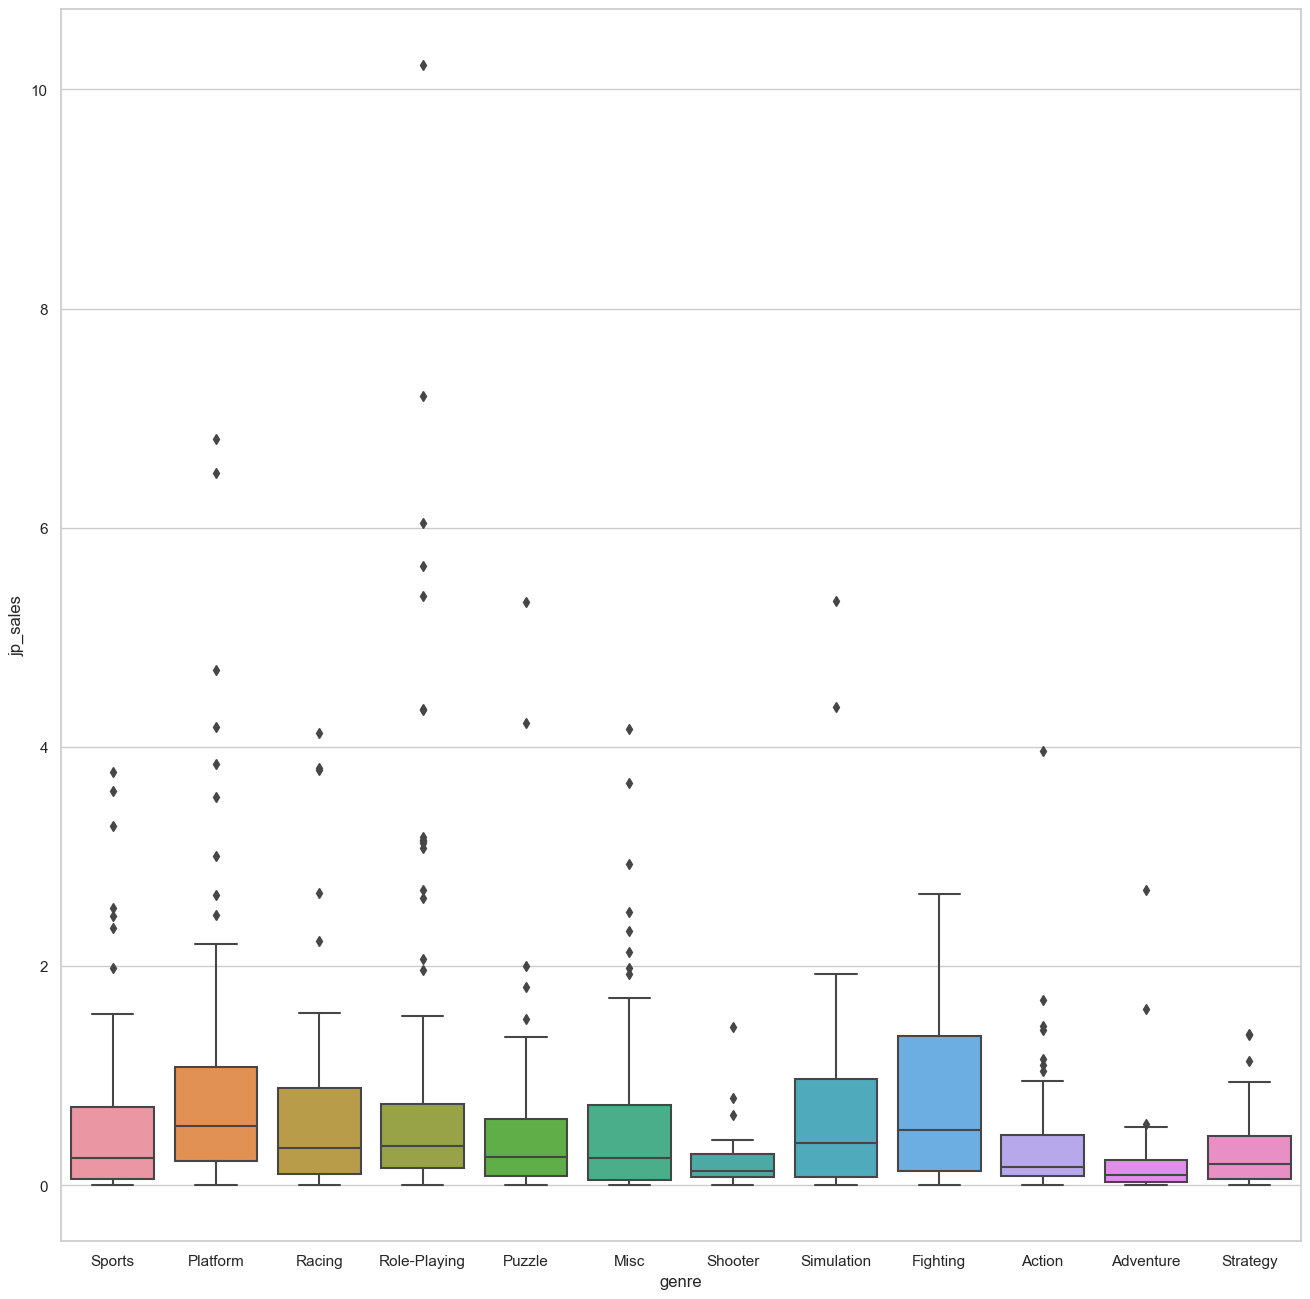

In [29]:
plt.figure(figsize=(16,16))
sns.boxplot(data=nintendo, x='genre', y='jp_sales')

Ответ:
- Наибольший межквартильный размах наблюдается у игр жанра Fighting
- Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
- Межквартильный размах у Strategy меньше, чем у Puzzle

# Задание 7
Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [30]:
nintendo_1 = nintendo\
                .query("genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")\
                .groupby(['genre', 'year']).global_sales.sum().reset_index()

In [31]:
nintendo_1.head()

,genre,year,global_sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55


<Axes: xlabel='year', ylabel='global_sales'>

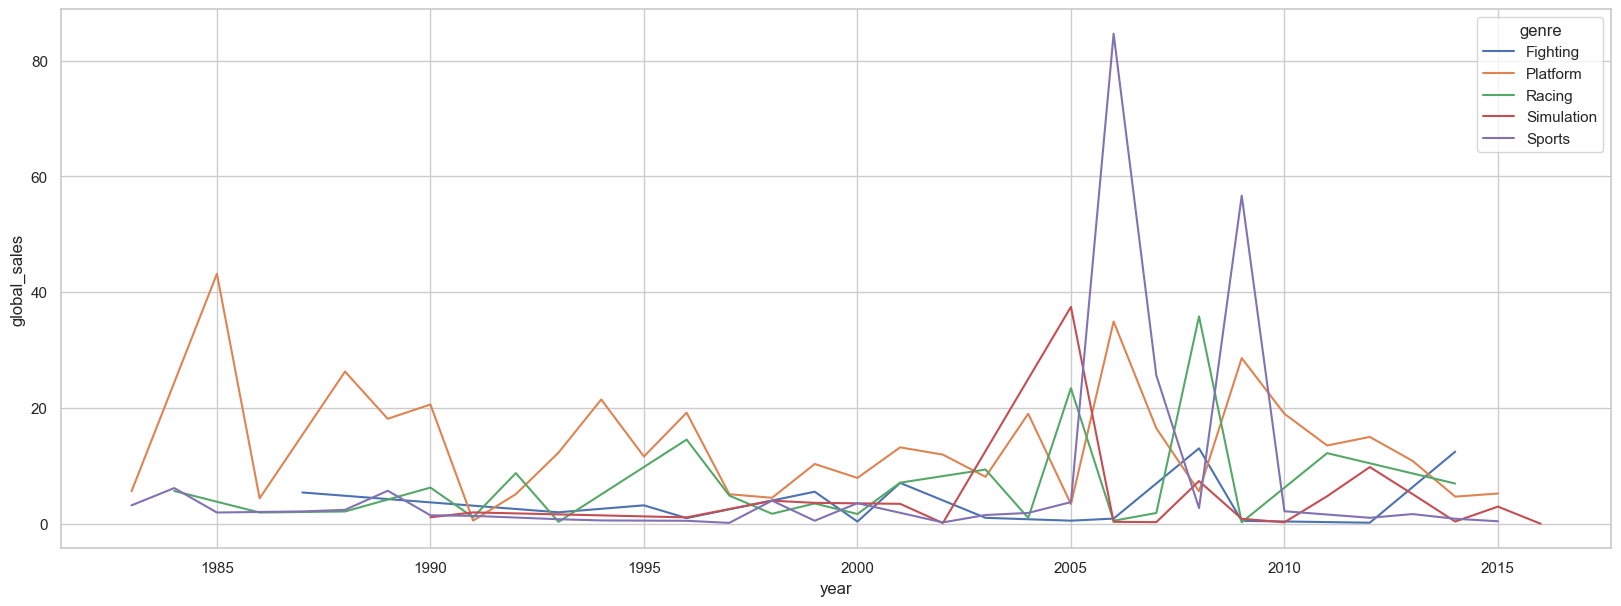

In [32]:
sns.lineplot(data=nintendo_1, x='year', y='global_sales', hue='genre')

Ответ:
 На отрезке времени 2005-2010 игры жанра Sports были наиболее популярны